# Random Digits Exercice

### Description:
This is an exercise in hypothesis testing, specifically determining if a series of digits [0,9] is random or not. In order to determine this, one has to design and apply statistical tests, from which the degree of consistency of being random can be calculated.

### Your task:
Using tests of your choice/design, determine which of the seven data sets are consistent with being random, and which aren't. One is based on the digits you entered in the course questionaire, while the others range from poor/quasi random to truly random. See if you can determine your (human) dataset.

###  Author: 
Troels Petersen ([email](mailto:petersen@nbi.dk))

###  Date:
4th of December 2020

---

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats
import os, sys                                         # Modules to see files and folders in directories
from os.path import dirname as parent_folder

In [2]:
sys.path.append('../../../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

In [3]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

---
## Define your functions here:


In [22]:
# Fill 1d histograms:
def create_1d_hist(ax, values, bins, x_range, title):
    ax.hist(values, bins, x_range, histtype='step', density=False, lw=2)         
    ax.set(xlim=x_range, title=title)
    hist_data = np.histogram(values, bins, x_range)
    return hist_data

In [23]:
# Calculate the ChiSquare value for comparison of histogram with constant.
# This is not a fit, as there are no free parameters: We know the number of events and bins!
def get_chi2_ndf( hist, const):
    data = hist[0]
    const_unnormed = const * data.sum()
    chi2 = np.sum( (data - const_unnormed)**2 / data )
    ndof = data.size
    return chi2, ndof

---
## Import random numbers from text file:

In [24]:
# Define list of input files:
dataset_letter='A' # between A and G
infiles = ["data_RandomDigits2019_" + dataset_letter + ".txt" ]

In [25]:
# List containing all numbers:
numbers = []

In [26]:
# Loop over input files open them in read mode
for ifile in infiles : 
    with open( ifile, "r" ) as current_file : 
        # Extract current file info : Loop through each line in the file, loop through each character
        # in the line, demand character is not empty ("") and convert the result to an integer
        # Finally add result to the numbers list
        numbers += [int(char) for line in current_file for char in line.strip() if char is not ""]

In [27]:
numbers = np.array(numbers)
print(numbers, len(numbers))

[3 9 0 ... 8 6 2] 4924


---
## Define your tests:

Here is an example plot from the data, just for convenience. It is all up to you from here...

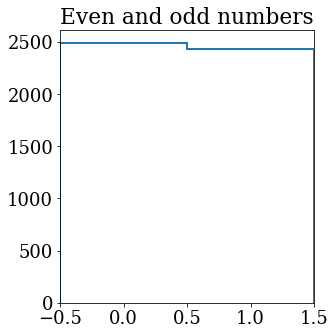

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Fill 1d histograms and plot them (for illustration):
hist_odd_even = create_1d_hist(ax, numbers % 2,  2, (-0.5, 1.5), 'Even and odd numbers')   # Is number even or odd
fig.tight_layout()

Questions:
---
 1. Discuss with your peers, what criteria truly random numbers should satisfy, and how these criteria can be tested.
    Based on this and on the discussion in class, write up such tests, and run all the datasets through to see
    if some do not seem to be truly random.

 2. The non-human data sets are supposedly random, however they are more regular (in some sense) than the humanly generated one.  See if you can determine which one is "your" (humanly generated) data.